In [6]:
import pandas as pd
import numpy as np

In [7]:
#codigo abaixo esta puxando um arquivo de dados csv do github para a analise usando o pandas no formato de dataframe
#origem dos dados: https://www.kaggle.com
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [8]:
df_limpo = df.dropna()   #removendo os campos nulos do dataframe
df_limpo.isnull().sum()  #verifica se ainda existem campos nulos

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
print(df_limpo.info())  #mostra as informações do dataframe limpo

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133339 non-null  object 
 2   employment_type     133339 non-null  object 
 3   job_title           133339 non-null  object 
 4   salary              133339 non-null  int64  
 5   salary_currency     133339 non-null  object 
 6   salary_in_usd       133339 non-null  int64  
 7   employee_residence  133339 non-null  object 
 8   remote_ratio        133339 non-null  int64  
 9   company_location    133339 non-null  object 
 10  company_size        133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB
None


In [10]:
df_limpo = df_limpo.assign(work_year = df_limpo['work_year'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133339 non-null  int64 
 1   experience_level    133339 non-null  object
 2   employment_type     133339 non-null  object
 3   job_title           133339 non-null  object
 4   salary              133339 non-null  int64 
 5   salary_currency     133339 non-null  object
 6   salary_in_usd       133339 non-null  int64 
 7   employee_residence  133339 non-null  object
 8   remote_ratio        133339 non-null  int64 
 9   company_location    133339 non-null  object
 10  company_size        133339 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.2+ MB


In [11]:
df_limpo.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


<Axes: title={'center': 'Nível de Experiência'}, xlabel='experience_level'>

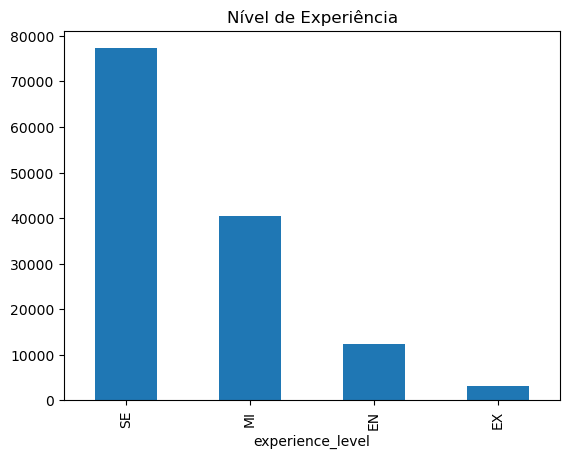

In [12]:
df_limpo['experience_level'].value_counts().plot(kind='bar', title='Nível de Experiência')

In [13]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

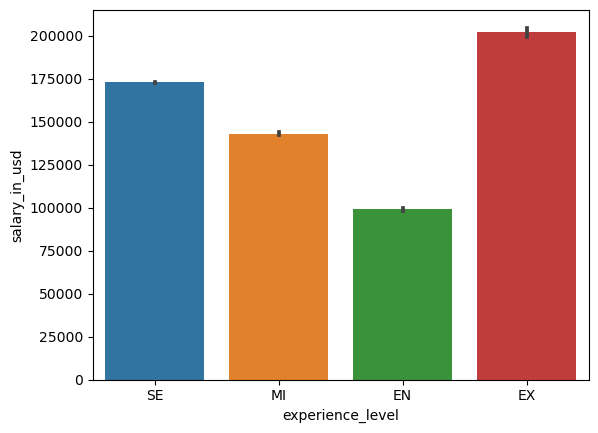

In [14]:
sns.barplot(data=df_limpo, x='experience_level', y='salary_in_usd')

In [15]:
import matplotlib.pyplot as plt

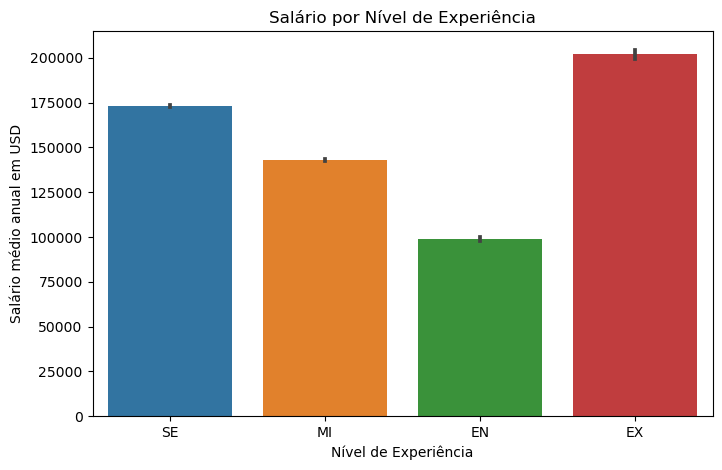

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='experience_level', y='salary_in_usd')
plt.title('Salário por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário médio anual em USD')
plt.show()

In [17]:
df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

experience_level
EX    202027.667813
SE    172850.838301
MI    143044.845979
EN     99034.963267
Name: salary_in_usd, dtype: float64

In [18]:
ordem =df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='experience_level')

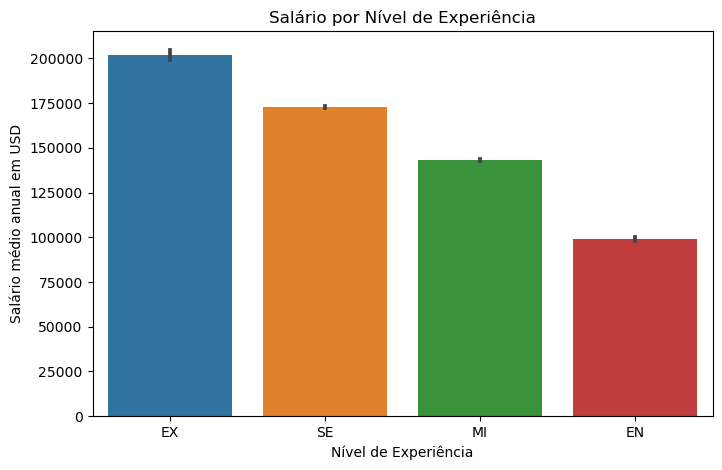

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='experience_level', y='salary_in_usd',order=ordem)
plt.title('Salário por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário médio anual em USD')
plt.show()

c:\Users\ismae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


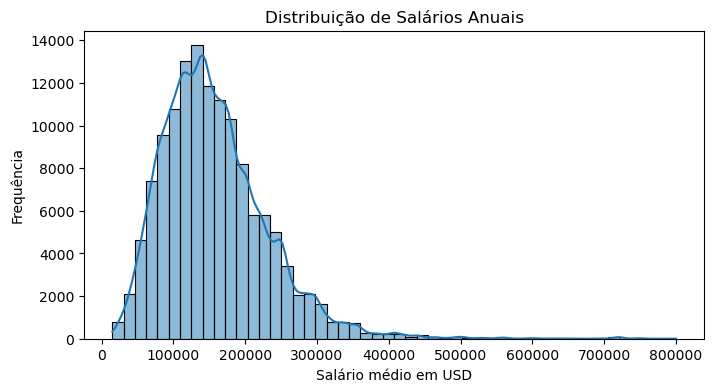

In [ ]:
plt.figure(figsize=(8,4))#altura e largura da figura
#histograma com densidade
#bins é a largura dos intervalos
#kde é a estimativa de densidade kernel(linha azul)
sns.histplot(df_limpo['salary_in_usd'], bins=50, kde=True)

plt.title('Distribuição de Salários Anuais')
plt.xlabel('Salário médio em USD')
plt.ylabel('Frequência')
plt.show()

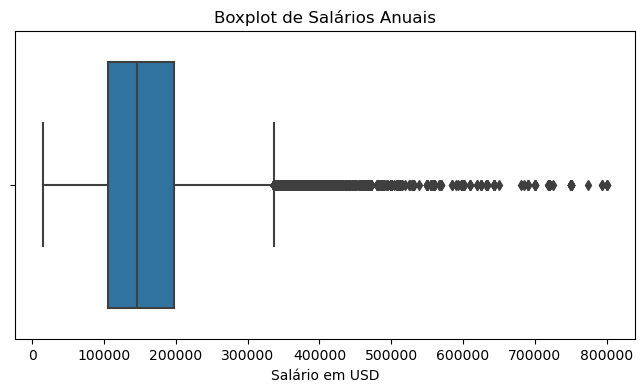

In [22]:
plt.figure(figsize=(8,4))#altura e largura da figura
sns.boxplot(x=df_limpo['salary_in_usd'])
plt.title('Boxplot de Salários Anuais')
plt.xlabel('Salário em USD')
#plt.ylabel('Frequência')
plt.show()

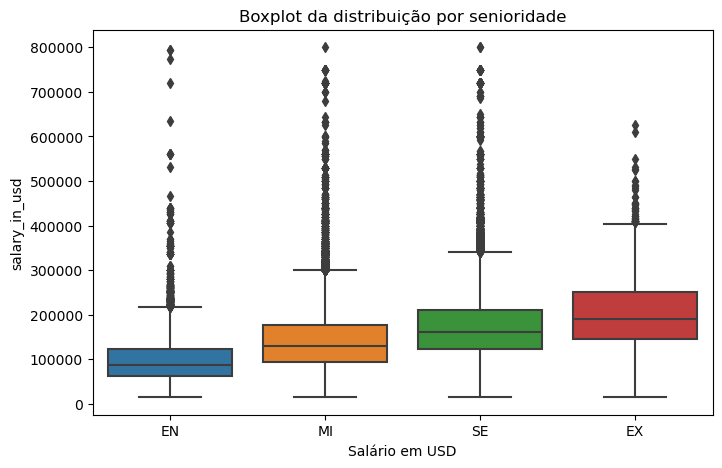

In [25]:
ordem_senioridade = ['EN', 'MI', 'SE', 'EX']

plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

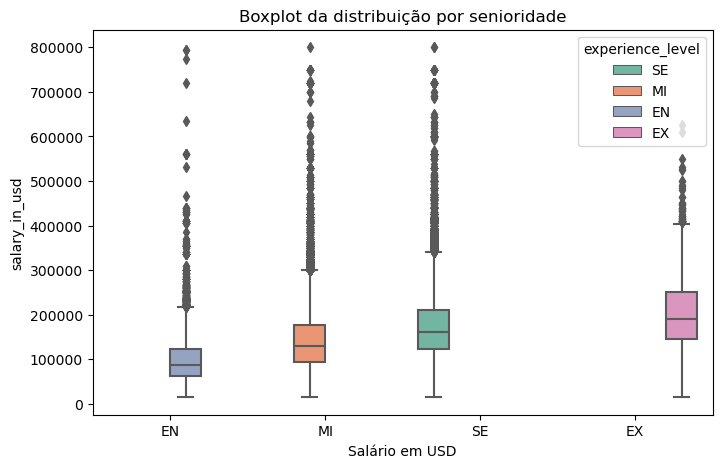

In [27]:
ordem_senioridade = ['EN', 'MI', 'SE', 'EX']

plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_limpo, order=ordem_senioridade,palette='Set2', hue='experience_level')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [28]:
import plotly.express as px

In [30]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='experience_level',
             y='salary_in_usd',
             title='Média Salarial por Senioridade',
             labels={'experience_level': 'Nível de Senioridade', 'salary_in_usd': 'Média Salarial Anual (USD)'})

fig.show()

In [ ]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()

# Sigla 	Significado
# 0 	Presencial
# 100 	Remoto
# 50 	Híbrido

In [34]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5

          )

fig.show()

# Sigla 	Significado
# 0 	Presencial
# 100 	Remoto
# 50 	Híbrido

In [35]:
remoto_contagem = df_limpo['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')

fig.show()

# Sigla 	Significado
# 0 	Presencial
# 100 	Remoto
# 50 	Híbrido

In [37]:
pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------- ------------------------------- 1.3/6.3 MB 8.4 MB/s eta 0:00:01
   -------------------------- ------------- 4.2/6.3 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 12.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['employee_residence'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['job_title'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salary_in_usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salary_in_usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'salary_in_usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [40]:


df_limpo.head()
     


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residencia_iso3
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M,USA
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M,USA
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M,AUS
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M,AUS
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M,USA


In [41]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)
# O arquivo CSV será salvo na mesma pasta do seu script